<a href="https://colab.research.google.com/github/eriqneo/Portfolio-Projects/blob/main/NetflixCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns

In [2]:
netflix = pd.read_csv('netflix.csv')

In [18]:
netflix.head()
#netflix.tail(10)

,Title,Genre,Language,Premiere,Runtime,Seasons
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes"
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes"
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes"
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes"
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes"


In [7]:
netflix.shape

(363, 6)

In [10]:
#finding out missing data/values

for col in netflix.columns:
  pct_missing = np.mean(netflix[col].isnull())
  print('{}-{}%'.format(col, pct_missing))

Title-0.005509641873278237%
Genre-0.10192837465564739%
Language-0.0%
Premiere-0.005509641873278237%
Runtime-0.005509641873278237%
Seasons-0.005509641873278237%


<Axes: >

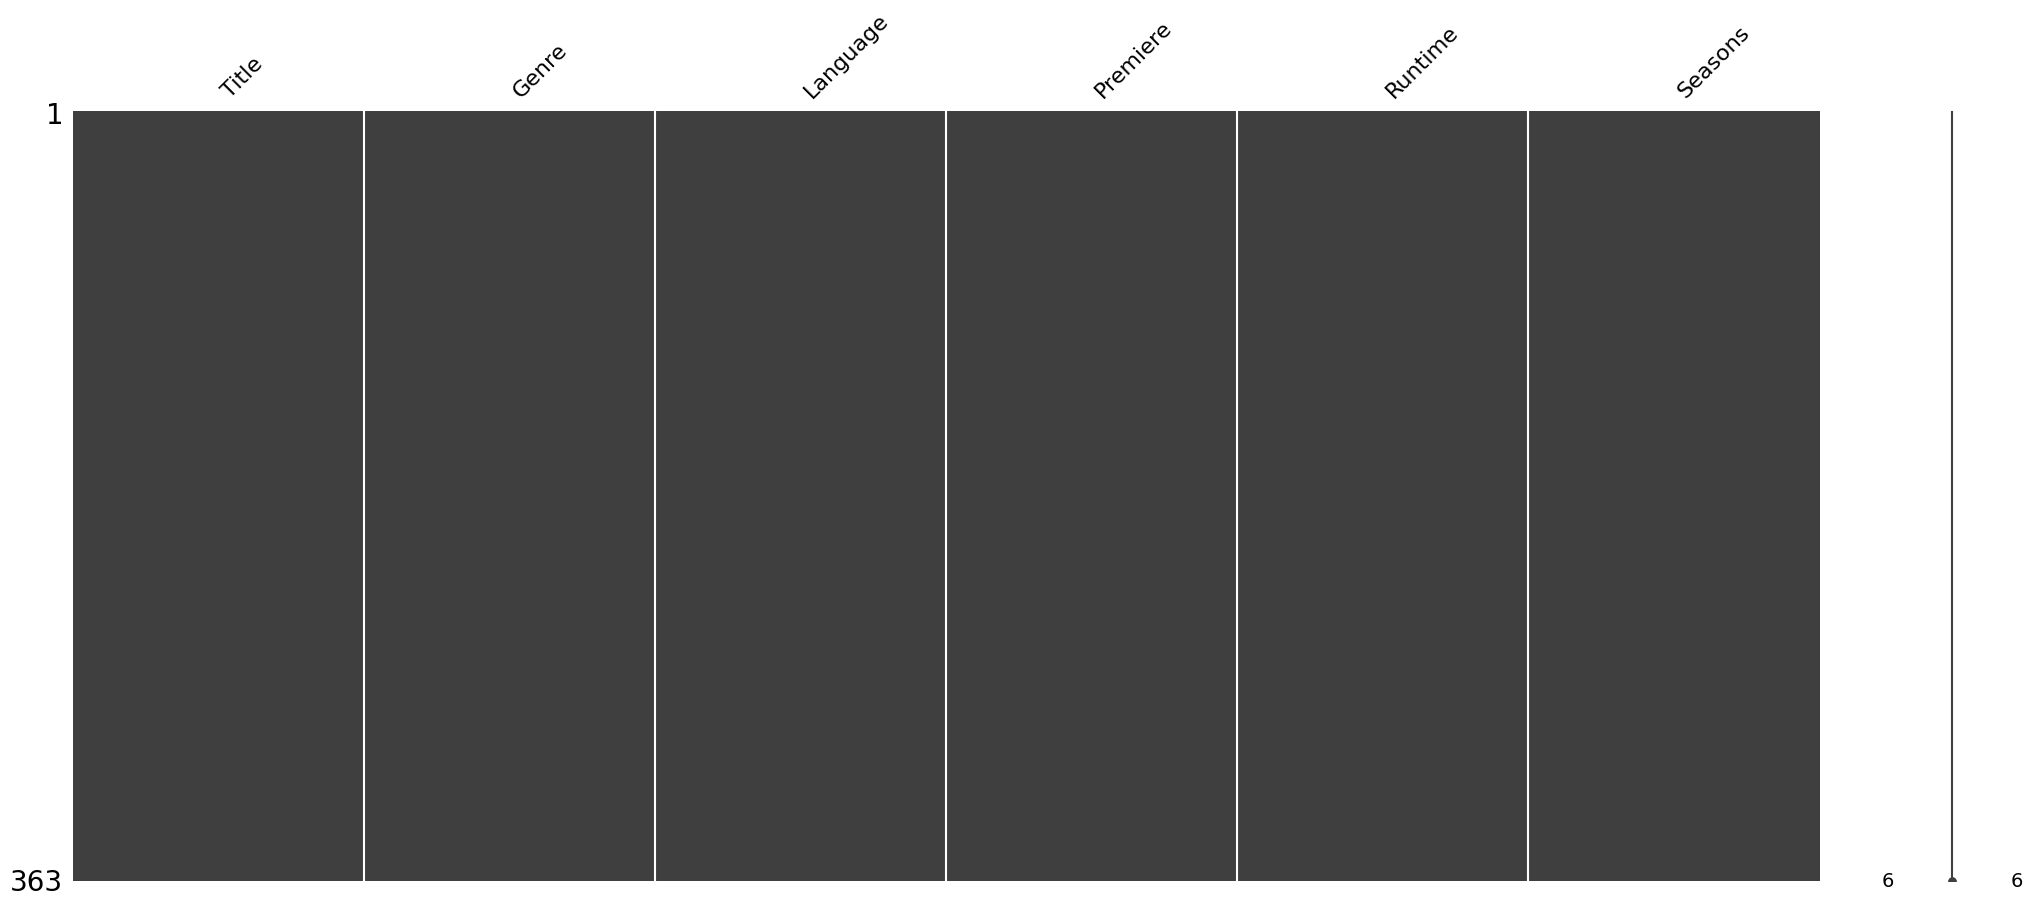

In [22]:
# Create heatmap of missing values following above imputation
import missingno as msno

# Create a heatmap of missing values
msno.matrix(netflix)


I have decided to handle the missing data by replacing the missing columns with default values of "Uknown".

In [21]:
#Define default values for replacement

default_values = {
    'Title' : 'Uknown',
    'Genre': 'Unknown',
    'Language': 'Unknown',
    'Premiere': 'Unknown',
    'Runtime': 'Unknown',
    'Seasons': 'Unknown'
}

# Replace missing values in each column with the corresponding default
for col, default_values in default_values.items():
  netflix[col].fillna(default_values, inplace = True)

In [23]:
netflix.dtypes

Title       object
Genre       object
Language    object
Premiere    object
Runtime     object
Seasons     object
dtype: object

In [24]:
# crete a new column 'Year_Released' from Premier and keep the year only

netflix['Year_Released'] = netflix['Premiere'].str.extract(r', (\d{4})')


In [25]:
netflix.head()

,Title,Genre,Language,Premiere,Runtime,Seasons,Year_Released
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes",2016
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes",2016
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",2017
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes",2019
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",2019


In [26]:
#lets see how many shows were produced per year

movies_per_year = netflix['Year_Released'].value_counts().sort_index()

movies_per_year.head()

2015     2
2016     2
2017     2
2018    13
2019    29
Name: Year_Released, dtype: int64

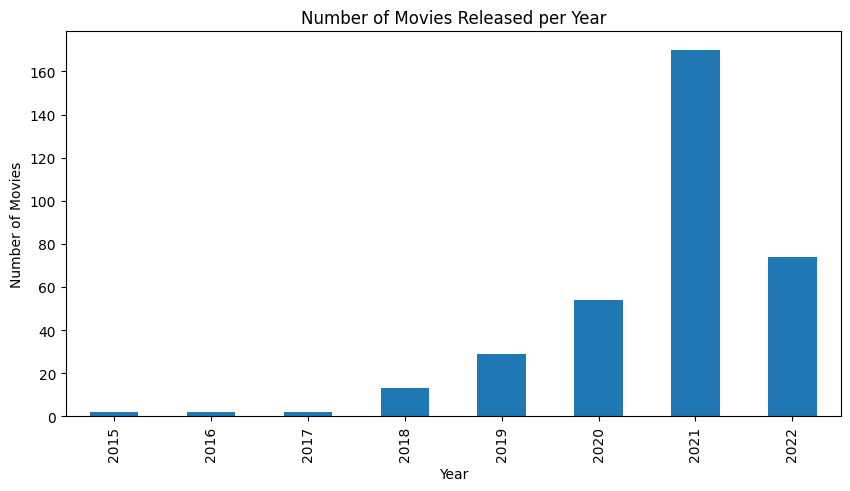

In [27]:
#create a bar chart using above df

movies_per_year.plot(kind = 'bar', figsize = (10, 5))
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


In [29]:
#lets see Eglish movies released

eng_movies = netflix['Language'].value_counts().sort_index()

eng_movies.head()

Arabic                2
Awaiting release      7
Dutch                 3
English             289
French                2
Name: Language, dtype: int64

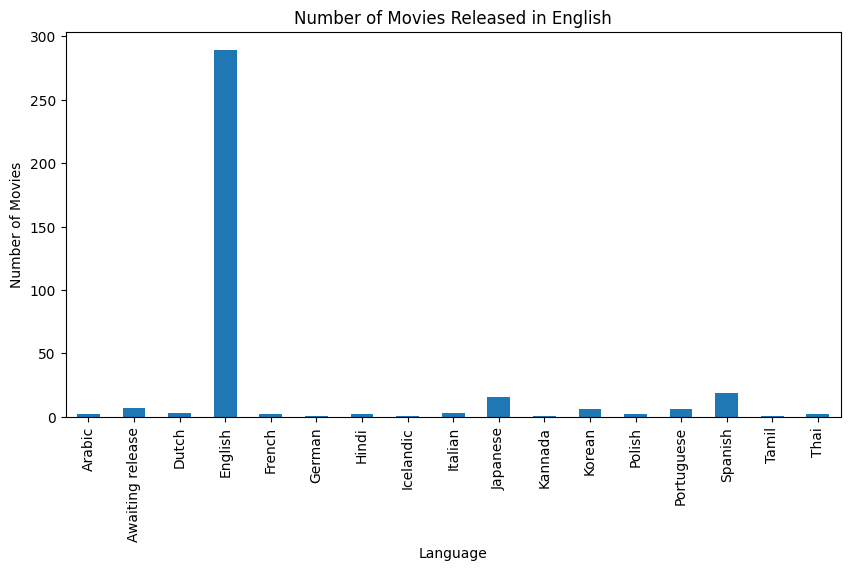

In [30]:
# using above df, create a bar chart

eng_movies.plot(kind = 'bar', figsize = (10, 5))
plt.title('Number of Movies Released in English')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show()


finding out which month has the highest release

In [32]:
#Creating a column for month
# Split 'Premiere' column by comma and extract the first element (month)
netflix['Month_Released'] = netflix['Premiere'].str.extract(r'(\w+) \d{1,2}, \d{4}')

# Display the DataFrame after extraction
netflix.head()


,Title,Genre,Language,Premiere,Runtime,Seasons,Year_Released,Month_Released
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes",2016,July
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes",2016,November
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",2017,July
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes",2019,February
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",2019,April


In [41]:
#month with the highest releases
month_released = netflix['Month_Released'].value_counts().sort_index(ascending=False)

month_released.head(12)

April        28
August       20
December     26
February     23
January      35
July         28
June         20
March        46
May          20
November     28
October      35
September    37
Name: Month_Released, dtype: int64

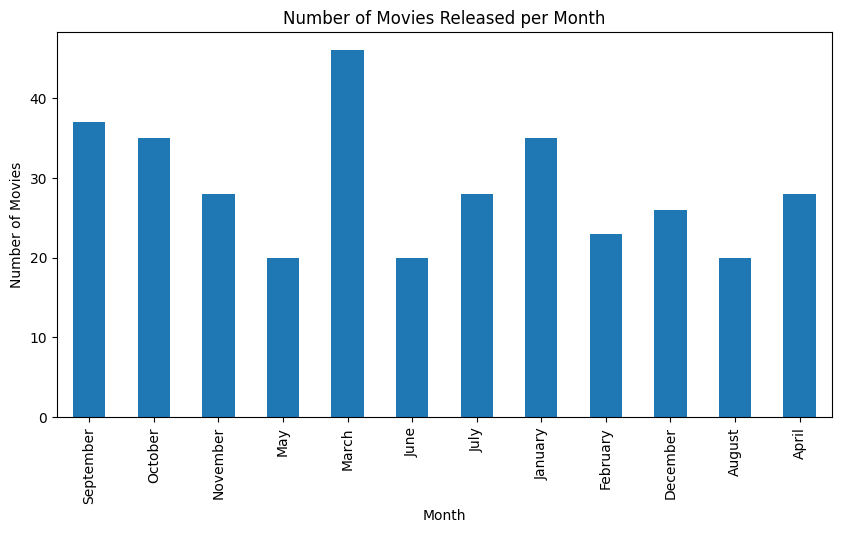

In [38]:
# prompt: using above df create a bar chart, the months to be in descending order

month_released.plot(kind = 'bar', figsize = (10, 5))
plt.title('Number of Movies Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()


finding shwows with more season

In [44]:
#finding shwows with more season

netflix['Season_Count'] = netflix['Seasons'].str.extract(r'^(\d+)')

netflix.head()

,Title,Genre,Language,Premiere,Runtime,Seasons,Year_Released,Month_Released,Runtime_numeric,Season_Count
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes",2016,July,42.0,3
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes",2016,November,47.0,4
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",2017,July,50.0,4
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes",2019,February,40.0,2
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",2019,April,21.0,2


In [53]:
movie_seasons = netflix['Season_Count'].value_counts().sort_index()

movie_seasons.head(20)

1    230
2     60
3     15
4     14
5      2
6      4
7      1
Name: Season_Count, dtype: int64

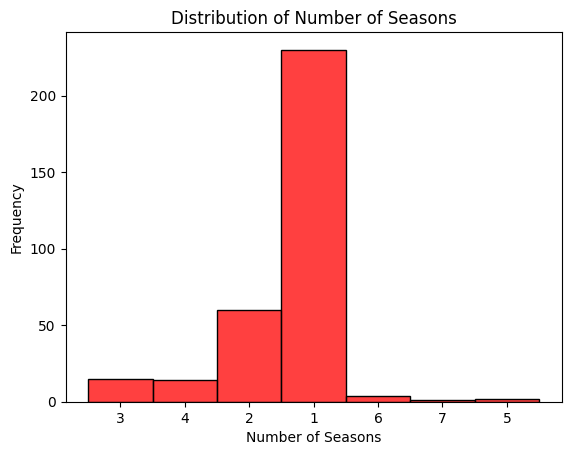

In [65]:
# prompt: have the above in a histplot

sns.histplot(netflix['Season_Count'], bins=10, color='red')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Seasons')
plt.show()
